In [11]:
import numpy as np # mathematical operations on arrays and matrices
import pandas as pd # pandas data frames and other operations
import missingno as msno # to show some graphs
import sys # required to check python version
import warnings
warnings.filterwarnings('ignore')
import matplotlib # for plotting graphs
%matplotlib inline  
from  matplotlib import pyplot 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score as kappa
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [2]:
# Step for importing the Dataset

In [4]:
OriginalData_Set=pd.read_csv("C:/Users/POOJAANAND/Documents/R/Kaggle/Project/XYZCorp_LendingData.txt",sep="\t",low_memory=False)

In [5]:
# Steps for Data description  and Summary

In [6]:
OriginalData_Set.shape # Shape of the data i.e rows and columns

(855969, 73)

In [7]:
OriginalData_Set.describe() # Data Summary 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


In [8]:
OriginalData_Set.info() # Telling us about the datatype of each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

count    855969.000000
mean      14732.378305
std        8419.471653
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64


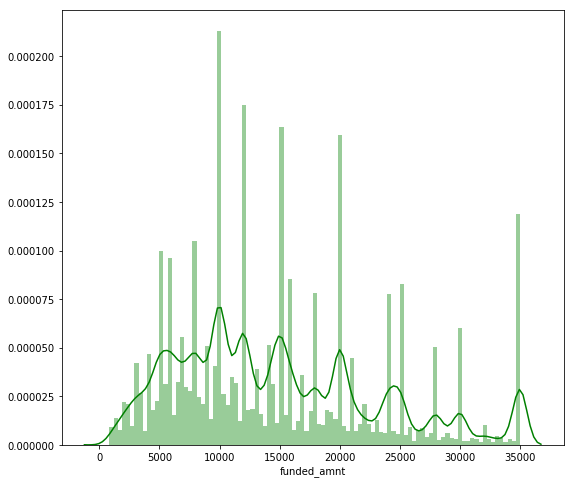

In [16]:
#check howz the funded amount is distributed
print(OriginalData_Set['funded_amnt'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(OriginalData_Set['funded_amnt'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [13]:
OriginalData_Set_num =OriginalData_Set.select_dtypes(include = ['float64', 'int64'])
OriginalData_Set_num.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


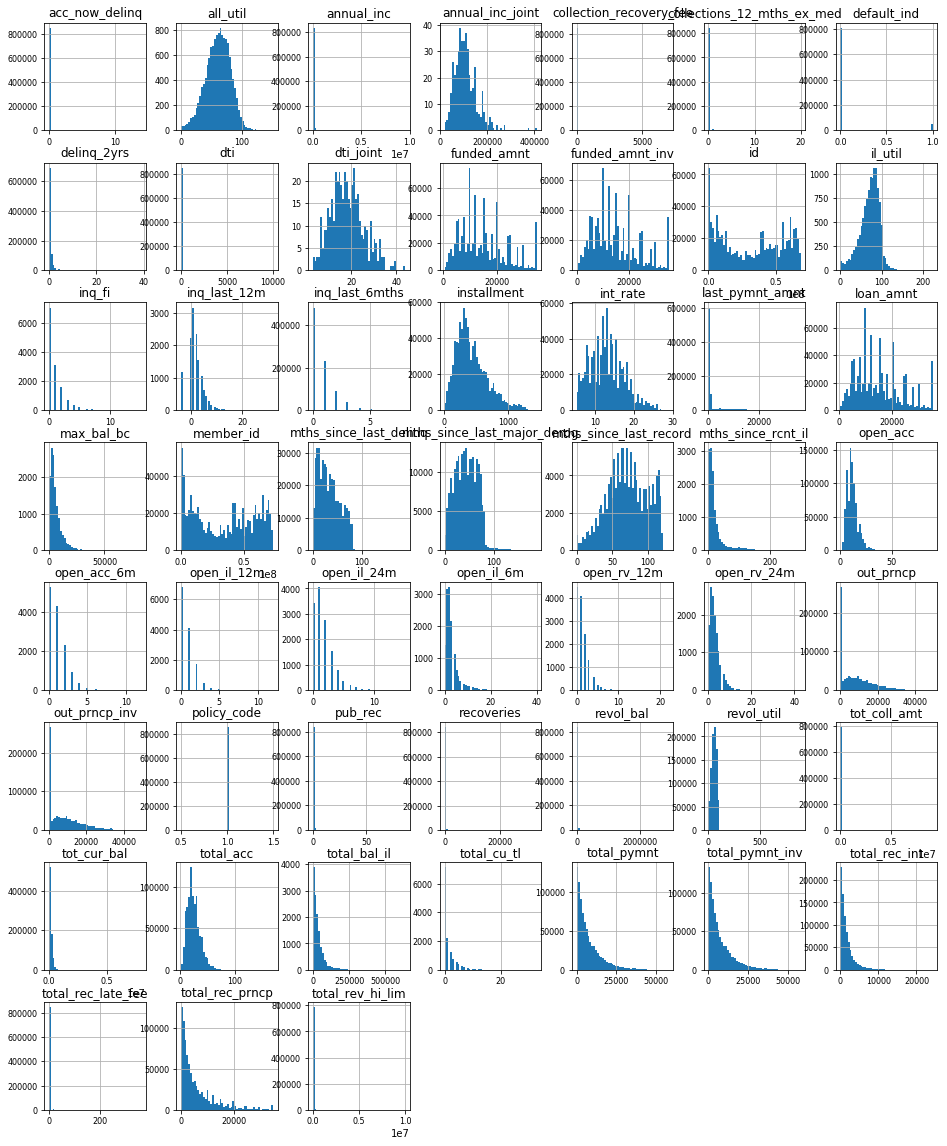

In [14]:
OriginalData_Set_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [17]:
# Steps for Missing Value Treatment

In [18]:
OriginalData_Set.isnull().sum()/len(OriginalData_Set)*100 # Percentage of data missing from each columns

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.776261
emp_length                      5.030673
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_d                         0.000000
pymnt_plan                      0.000000
desc                           85.769111
purpose                         0.000000
title                           0.003855
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_cr_line

In [19]:
Missing_Data=OriginalData_Set.columns[OriginalData_Set.isnull().any()].tolist() # Creating a dataframe with all columns having missing data

In [20]:
# Visual plot for missing data

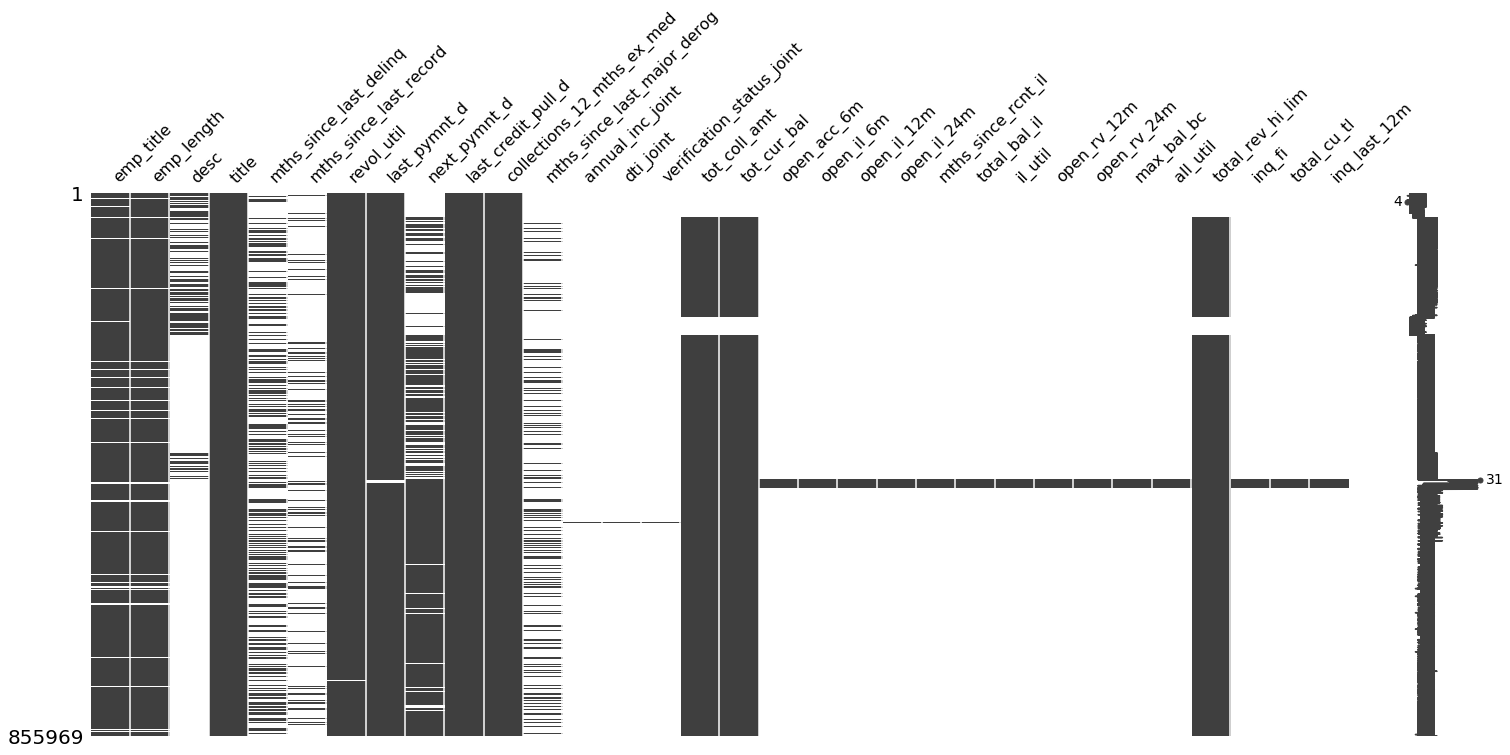

In [21]:
msno.matrix(OriginalData_Set[Missing_Data])

In [22]:
print('No. of columns with null values:'+ str(len(OriginalData_Set.columns[OriginalData_Set.isnull().any()])))

No. of columns with null values:32


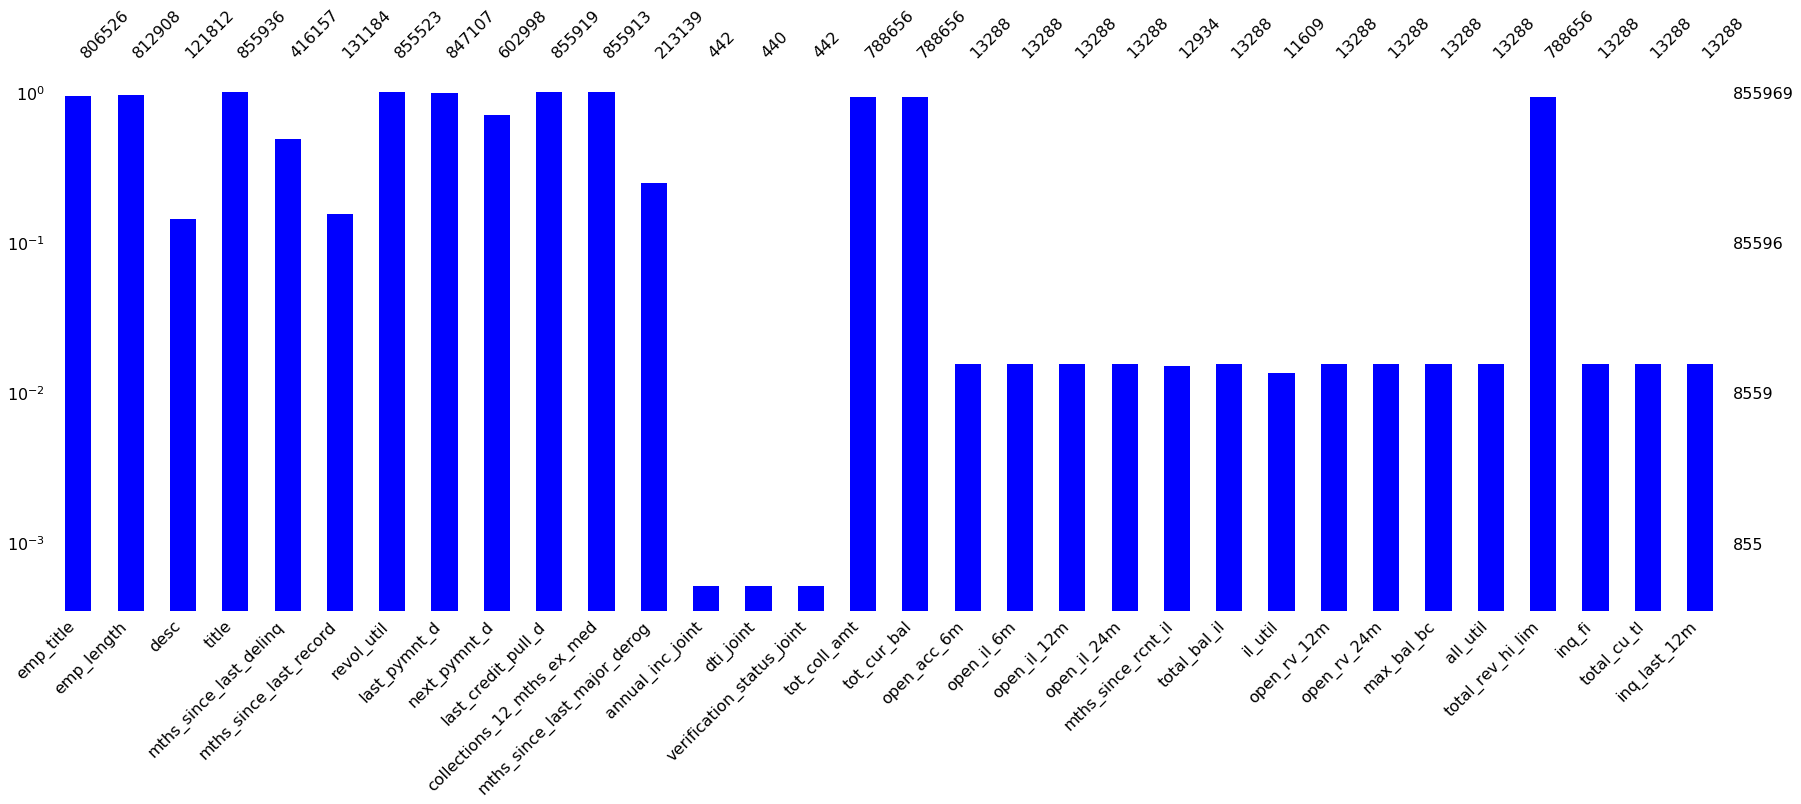

In [26]:
msno.bar(OriginalData_Set[Missing_Data], color='blue', log=True, figsize=(30,10))

In [27]:
#pandas_profiling library is very helpful in suggesting the features that we should get rid off and also the basic info
 #we  needed for each variable
import pandas_profiling
import pandas


In [28]:
pandas_profiling.ProfileReport(OriginalData_Set)

Number of variables,73
Number of observations,855969
Total Missing (%),27.9%
Total size in memory,476.7 MiB
Average record size in memory,584.0 B
Numeric,43
Categorical,21
Boolean,1
Date,0
Text (Unique),0
Rejected,8


In [29]:
Data=OriginalData_Set.copy()

In [ ]:
Data=Data.dropna(axis='columns',thresh=0.5*len(Data))

In [ ]:
print("No. of columns left :"+str(len(Data.columns)))

In [ ]:
Data=Data.dropna(thresh=39,axis=0)

In [ ]:
Data1=Data.copy()

In [ ]:
Data1.shape

In [ ]:
# Selecting the necessary variables for data modelling purpose

In [ ]:
Predictors=['addr_state',
'annual_inc',
'application_type',
'default_ind',
'grade',
'home_ownership',
'initial_list_status',
'inq_last_6mths',
'int_rate',
'issue_d',
'last_pymnt_amnt',
'loan_amnt',
'id',
'out_prncp',
'purpose',
'pub_rec',
'sub_grade',
'term',
'tot_cur_bal',
'verification_status']

In [ ]:
Working_Data=Data1[Predictors]

In [ ]:
Working_Data.shape

In [ ]:
# Checking the missing values in extracted data

In [ ]:
Working_Data.isnull().sum()

In [ ]:
Working_Data['tot_cur_bal'].describe()

In [ ]:
m=Working_Data['tot_cur_bal'].median()

In [ ]:
Working_Data['tot_cur_bal']=Working_Data['tot_cur_bal'].fillna(m)

In [ ]:
bx=Working_Data.boxplot(column=['tot_cur_bal'])

In [ ]:
Working_Data.isnull().sum()

In [ ]:
Working_Data.info()

In [ ]:
columns=Working_Data.select_dtypes(include=['object'])

In [ ]:
columns.columns

In [ ]:
Data_encoded = pd.get_dummies(Working_Data, columns=['addr_state', 'application_type', 'grade', 'home_ownership',
       'initial_list_status', 'purpose', 'sub_grade', 'term',
       'verification_status'], drop_first=True)

In [ ]:
Data_encoded.shape

In [ ]:
Data_encoded.head()

In [ ]:
Data_encoded['issue_d']=pd.to_datetime(Data_encoded['issue_d'])

In [ ]:
split_date = pd.datetime(2015,5,31)

In [ ]:
TrainData = Data_encoded.loc[Data_encoded['issue_d'] <= split_date]
TestData = Data_encoded.loc[Data_encoded['issue_d'] > split_date]

In [ ]:
print("The shape of Train_data is:",TrainData.shape,"The shape of Test_data is:",TestData.shape)

In [ ]:
ColumnsList=Data_encoded.columns.tolist()

In [ ]:
ColumnsList

In [ ]:
features=['annual_inc',
 'inq_last_6mths',
 'int_rate',
 'last_pymnt_amnt',
 'loan_amnt',
 'out_prncp',
 'pub_rec',
 'tot_cur_bal',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_state_FL',
 'addr_state_GA',
 'addr_state_HI',
 'addr_state_IA',
 'addr_state_ID',
 'addr_state_IL',
 'addr_state_IN',
 'addr_state_KS',
 'addr_state_KY',
 'addr_state_LA', 
 'addr_state_MA',
 'addr_state_MD',
 'addr_state_ME',
 'addr_state_MI',
 'addr_state_MN',
 'addr_state_MO',
 'addr_state_MS',
 'addr_state_MT',
 'addr_state_NC',
 'addr_state_ND',
 'addr_state_NE',
 'addr_state_NH',
 'addr_state_NJ',
 'addr_state_NM',
 'addr_state_NV',
 'addr_state_NY',
 'addr_state_OH',
 'addr_state_OK',
 'addr_state_OR',
 'addr_state_PA',
 'addr_state_RI',
 'addr_state_SC',
 'addr_state_SD',
 'addr_state_TN',
 'addr_state_TX',
 'addr_state_UT',
 'addr_state_VA',
 'addr_state_VT',
 'addr_state_WA',
 'addr_state_WI',
 'addr_state_WV',
 'addr_state_WY',
 'application_type_JOINT',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'initial_list_status_w',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 'sub_grade_F5',
 'sub_grade_G1',
 'sub_grade_G2',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G5',
 'term_ 60 months',
 'verification_status_Source Verified',
 'verification_status_Verified']

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
Train_X=min_max_scaler.fit_transform(TrainData[features])  
Train_y= np.vstack(TrainData['default_ind'].values)

In [ ]:
print("Train_X shape:",Train_X.shape,"Train_y shape:",Train_y.shape)

In [ ]:
Test_X=min_max_scaler.fit_transform(TestData[features])  
Test_y= np.vstack(TestData['default_ind'].values)

In [ ]:
print("Test_X shape:",Test_X.shape,"Test_y shape:",Test_y.shape)

In [ ]:
Logistic_Model=LogisticRegression(solver='liblinear',max_iter=1000,random_state=123)

In [ ]:
Logistic_Model.fit(Train_X,Train_y)

In [ ]:
Train_y_Pred=Logistic_Model.predict(Train_X)

In [ ]:
Test_y_Pred=Logistic_Model.predict(Test_X)

In [ ]:
# Mdel Accuracy with training data set is 94.7 % using LR

In [ ]:
cols=['Model','ROC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score']
models_report=pd.DataFrame(columns=cols)
tmp= pd.Series({'Model': "Logistic Regression",
                'ROC Score':metrics.roc_auc_score(Train_y,Train_y_Pred),
                'Precision Score':metrics.precision_score(Train_y,Train_y_Pred),
                'Recall Score':metrics.recall_score(Train_y,Train_y_Pred),
                'Accuracy Score':metrics.accuracy_score(Train_y,Train_y_Pred),
                'Kappa Score':metrics.cohen_kappa_score(Train_y,Train_y_Pred) })
model_report =models_report.append(tmp,ignore_index=True)
print(model_report)

In [ ]:
# Model Accuracy with Test Data Set is 99.86% using LR

In [ ]:
cols=['Model','ROC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score']
models_report=pd.DataFrame(columns=cols)
tmp= pd.Series({'Model': "Logistic Regression",
                'ROC Score':metrics.roc_auc_score(Test_y,Test_y_Pred),
                'Precision Score':metrics.precision_score(Test_y,Test_y_Pred),
                'Recall Score':metrics.recall_score(Test_y,Test_y_Pred),
                'Accuracy Score':metrics.accuracy_score(Test_y,Test_y_Pred),
                'Kappa Score':metrics.cohen_kappa_score(Test_y,Test_y_Pred) })
model_report =models_report.append(tmp,ignore_index=True)
print(model_report)

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = Logistic_Model.predict_proba(Test_X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
plt.title('Receiver Operating Characteristic For Logistic_Regression Approach')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Using Naive_Bayes approach

In [ ]:
gnb=GaussianNB()
Model_NB=gnb.fit(Train_X,Train_y)

In [ ]:
Train_y_pred_NB=Model_NB.predict(Train_X)

In [ ]:
Test_y_pred_NB=Model_NB.predict(Test_X)

In [ ]:
# Model Accuracy for Train Data Set is 85.6% using Naive Bayes approach

In [ ]:
cols=['Model','ROC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score']
models_report=pd.DataFrame(columns=cols)
tmp= pd.Series({'Model': "Naive_Bayes",
                'ROC Score':metrics.roc_auc_score(Train_y,Train_y_pred_NB),
                'Precision Score':metrics.precision_score(Train_y,Train_y_pred_NB),
                'Recall Score':metrics.recall_score(Train_y,Train_y_pred_NB),
                'Accuracy Score':metrics.accuracy_score(Train_y,Train_y_pred_NB),
                'Kappa Score':metrics.cohen_kappa_score(Train_y,Train_y_pred_NB) })
model_report =models_report.append(tmp,ignore_index=True)
print(model_report)

In [ ]:
# Model Accuracy for Test Data Set is 87.83% using Naive Bayes approach

In [ ]:
cols=['Model','ROC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score']
models_report=pd.DataFrame(columns=cols)
tmp= pd.Series({'Model': "Naive_Bayes",
                'ROC Score':metrics.roc_auc_score(Test_y,Test_y_pred_NB),
                'Precision Score':metrics.precision_score(Test_y,Test_y_pred_NB),
                'Recall Score':metrics.recall_score(Test_y,Test_y_pred_NB),
                'Accuracy Score':metrics.accuracy_score(Test_y,Test_y_pred_NB),
                'Kappa Score':metrics.cohen_kappa_score(Test_y,Test_y_pred_NB) })
model_report =models_report.append(tmp,ignore_index=True)
print(model_report)

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = Model_NB.predict_proba(Test_X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
plt.title('Receiver Operating Characteristic For Naive_Bayes Approach')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Using Confusion Matrix to check the True positive rate

In [ ]:
Test_y_pred_NB_List=Test_y_pred_NB.tolist()

In [ ]:
TrueVal_y=Test_y.tolist()

In [ ]:
sklearn.metrics.confusion_matrix(TrueVal_y,Test_y_pred_NB_List, labels=[0,1], sample_weight=None)

In [ ]:
# Using Decision Tree Approach!!!

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
Model_DT = DecisionTreeClassifier()  
Model_DT.fit(Train_X, Train_y)  

In [ ]:
Train_y_Pred_DT=Model_DT.predict(Train_X)

In [ ]:
Test_y_Pred_DT=Model_DT.predict(Test_X)

In [ ]:
# Model accuracy for Train Data Set is 100% using Decision Tree Approach

In [ ]:
cols=['Model','ROC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score']
models_report=pd.DataFrame(columns=cols)
tmp= pd.Series({'Model': "Decision Tree",
                'ROC Score':metrics.roc_auc_score(Train_y,Train_y_Pred_DT),
                'Precision Score':metrics.precision_score(Train_y,Train_y_Pred_DT),
                'Recall Score':metrics.recall_score(Train_y,Train_y_Pred_DT),
                'Accuracy Score':metrics.accuracy_score(Train_y,Train_y_Pred_DT),
                'Kappa Score':metrics.cohen_kappa_score(Train_y,Train_y_Pred_DT) })
model_report =models_report.append(tmp,ignore_index=True)
print(model_report)

In [ ]:
# Model accuracy for Test Data Set is 98.87% using Decision Tree Approach

In [ ]:
cols=['Model','ROC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score']
models_report=pd.DataFrame(columns=cols)
tmp= pd.Series({'Model': "Decision Tree",
                'ROC Score':metrics.roc_auc_score(Test_y,Test_y_Pred_DT),
                'Precision Score':metrics.precision_score(Test_y,Test_y_Pred_DT),
                'Recall Score':metrics.recall_score(Test_y,Test_y_Pred_DT),
                'Accuracy Score':metrics.accuracy_score(Test_y,Test_y_Pred_DT),
                'Kappa Score':metrics.cohen_kappa_score(Test_y,Test_y_Pred_DT) })
model_report =models_report.append(tmp,ignore_index=True)
print(model_report)

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = Model_DT.predict_proba(Test_X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
plt.title('Receiver Operating Characteristic For Decision Tree Approach')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()